<a href="https://www.kaggle.com/code/areffarzanieh/brain-stroke-classification?scriptVersionId=102176751" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('../input/full-filled-brain-stroke-dataset/full_data.csv')
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4981.0,43.419859,22.662755,0.08,25.00,45.00,61.00,82.00
hypertension,4981.0,0.096165,0.294848,0.00,0.00,0.00,0.00,1.00
heart_disease,4981.0,0.055210,0.228412,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4981.0,105.943562,45.075373,55.12,77.23,91.85,113.86,271.74
bmi,4981.0,28.498173,6.790464,14.00,23.70,28.10,32.60,48.90
stroke,4981.0,0.049789,0.217531,0.00,0.00,0.00,0.00,1.00


In [4]:
df.isnull().sum()     #cheking for null values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# EDA

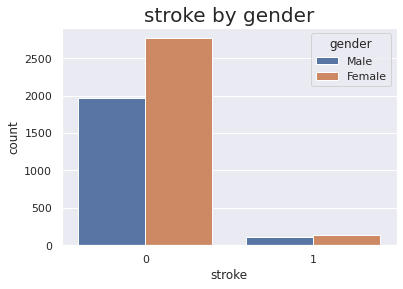

In [5]:
sns.countplot(data = df,x = df.stroke,hue='gender')
plt.title('stroke by gender',fontsize=20)
plt.show()

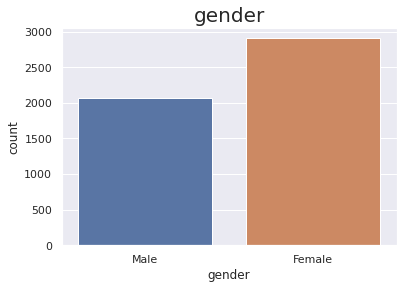

In [6]:
sns.countplot(data = df,x = df.gender)
plt.title('gender',fontsize=20)
plt.show()

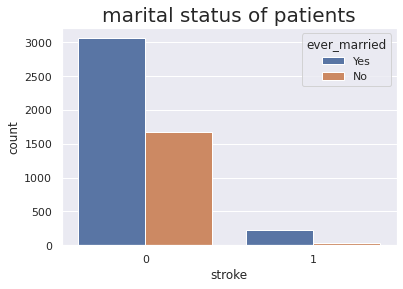

In [7]:
sns.countplot(data = df,x = df.stroke,hue='ever_married')
plt.title('marital status of patients',fontsize=20)
plt.show()

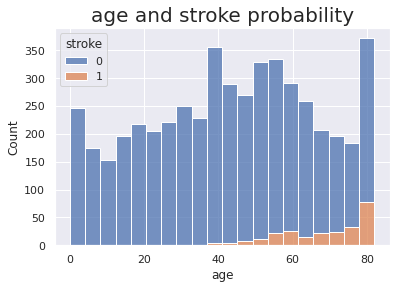

In [8]:
sns.histplot(df,x=df.age,hue='stroke',multiple='stack',linewidth=1)
plt.title('age and stroke probability',fontsize=20)
plt.show()

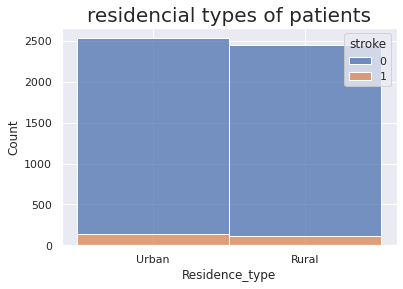

In [9]:
sns.histplot(df,x='Residence_type',hue='stroke',multiple='stack',linewidth=1)
plt.title('residencial types of patients',fontsize=20)
plt.show()

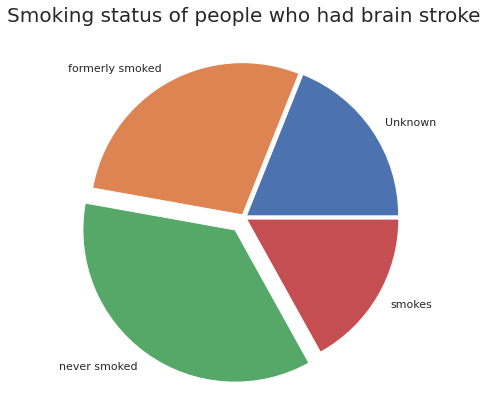

In [10]:
smoking_status = df.groupby(df['smoking_status'])['stroke'].sum()
df_smokig_status = pd.DataFrame({'labels':smoking_status.index,'values':smoking_status.values})
labels = smoking_status.index
values = smoking_status.values
plt.figure(figsize=(7,7))
plt.pie(values,labels=labels,explode=[0.02, 0.02, 0.1, 0.02])
plt.title('Smoking status of people who had brain stroke',fontsize=20)
plt.show()

# Pre processing

In [11]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## convering categorical features to numerical

In [12]:
print(f"value counts of gender: \n{df['gender'].value_counts()}\n")
print(f"value counts of ever_married: \n{df['ever_married'].value_counts()}\n")
print(f"value counts of work_type: \n{df['work_type'].value_counts()}\n")
print(f"value counts of smoking_status: \n{df['smoking_status'].value_counts()}\n")
print(f"value counts of Residence_type: \n{df['Residence_type'].value_counts()}\n")


value counts of gender: 
Female    2907
Male      2074
Name: gender, dtype: int64

value counts of ever_married: 
Yes    3280
No     1701
Name: ever_married, dtype: int64

value counts of work_type: 
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

value counts of smoking_status: 
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

value counts of Residence_type: 
Urban    2532
Rural    2449
Name: Residence_type, dtype: int64



In [13]:
df['gender'] = df['gender'].map({'Male':1,'Female':0})
df['ever_married'] = df['ever_married'].map({'Yes':1,'No':0})
df = pd.get_dummies(df,columns=['work_type','smoking_status','Residence_type'],drop_first=True)

## Scaling data

### some values are just 0 and 1 but other values should be scaled

In [14]:
sc = StandardScaler()
df_no_scaled = df[['age','avg_glucose_level','bmi']]
df.drop(['age','avg_glucose_level','bmi'],axis=1,inplace=True)

In [15]:
df_no_scaled = df_no_scaled.values
df_no_scaled = sc.fit_transform(df_no_scaled)
df_no_scaled = pd.DataFrame(df_no_scaled,columns = ['age','avg_glucose_level','bmi'])
df = pd.concat([df_no_scaled,df],axis=1)
df.head(2)

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,stroke,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban
0,1.040584,2.723411,1.193238,1,0,1,1,1,1,0,0,1,0,0,1
1,1.614270,-0.000523,0.589390,1,0,1,1,1,1,0,0,0,1,0,0


## Cheking for imbalancing

In [16]:
df.stroke.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

### obviously the data is imbalanced. we'll use sklearn for balancing the data:

In [17]:
from sklearn.utils import resample
stroke = df[df.stroke == 1]
not_stroke = df[df.stroke ==0]

In [18]:
not_stroke_downsample = resample(not_stroke,
             replace=True,
             n_samples=len(stroke),
             random_state=42)


In [19]:
df = pd.concat([stroke,not_stroke_downsample],axis=0)
df.stroke.value_counts()

1    248
0    248
Name: stroke, dtype: int64

In [20]:
X = df.drop('stroke',axis=1).values
y = df['stroke'].values


# Modeling

In [21]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.25 , random_state=11)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (372, 14)
X_test shape: (124, 14)
y_train shape: (372,)
y_test shape: (124,)


## Random Forest Classifier

accuracy score: 0.782258064516129

classification report:
              precision    recall  f1-score   support

           0       0.72      0.84      0.77        55
           1       0.85      0.74      0.79        69

    accuracy                           0.78       124
   macro avg       0.78      0.79      0.78       124
weighted avg       0.79      0.78      0.78       124



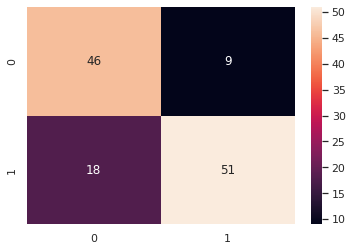

False negative rate: 26.08695652173913


In [22]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_prediction = rfc.predict(X_test)
print(f'accuracy score: {accuracy_score(rfc_prediction,y_test)}\n')
print(f'classification report:\n{classification_report(rfc_prediction,y_test)}')
sns.heatmap(confusion_matrix(rfc_prediction,y_test),annot=True)
plt.show()
tn, fp, fn, tp = confusion_matrix(rfc_prediction,y_test).ravel()
print(f'False negative rate: {fn / (tp + fn)*100}')

## Grid search

In [23]:
grid_search = GridSearchCV(rfc,param_grid = {'n_estimators':[30,50,100,150,200],'criterion':['gini','entropy','log_loss'],'max_depth':[5,10,20]},cv=10,scoring='recall')
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 150}
0.8666666666666666


accuracy score: 0.7741935483870968

classification report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        58
           1       0.82      0.74      0.78        66

    accuracy                           0.77       124
   macro avg       0.78      0.78      0.77       124
weighted avg       0.78      0.77      0.77       124



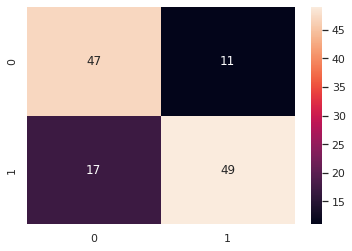

False negative rate: 25.757575757575758


In [24]:
grid_model = RandomForestClassifier(criterion='gini',max_depth=5,n_estimators=150)
grid_model.fit(X_train,y_train)
grid_prediction = grid_model.predict(X_test)
print(f'accuracy score: {accuracy_score(grid_prediction,y_test)}\n')
print(f'classification report:\n{classification_report(grid_prediction,y_test)}')
sns.heatmap(confusion_matrix(grid_prediction,y_test),annot=True)
plt.show()
tn, fp, fn, tp = confusion_matrix(grid_prediction,y_test).ravel()
print(f'False negative rate: {fn / (tp + fn)*100}')

## Logistic Regression

accuracy score: 0.7580645161290323

classification report:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        58
           1       0.80      0.73      0.76        66

    accuracy                           0.76       124
   macro avg       0.76      0.76      0.76       124
weighted avg       0.76      0.76      0.76       124



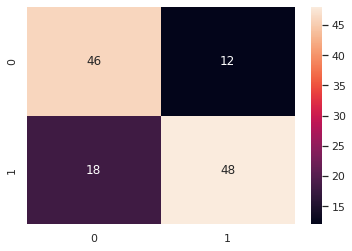

False negative rate: 27.27272727272727


In [25]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_prediction = lr.predict(X_test)
print(f'accuracy score: {accuracy_score(lr_prediction,y_test)}\n')
print(f'classification report:\n{classification_report(lr_prediction,y_test)}')
sns.heatmap(confusion_matrix(lr_prediction,y_test),annot=True)
plt.show()
tn, fp, fn, tp = confusion_matrix(lr_prediction,y_test).ravel()
print(f'False negative rate: {fn / (tp + fn)*100}')


## SVC

accuracy score: 0.7016129032258065

classification report:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        55
           1       0.77      0.67      0.71        69

    accuracy                           0.70       124
   macro avg       0.70      0.71      0.70       124
weighted avg       0.71      0.70      0.70       124



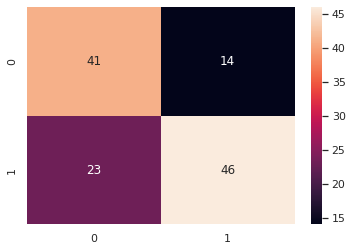

False negative rate: 33.33333333333333


In [26]:
svc = SVC()
svc.fit(X_train,y_train)
svc_prediction = svc.predict(X_test)
print(f'accuracy score: {accuracy_score(svc_prediction,y_test)}\n')
print(f'classification report:\n{classification_report(svc_prediction,y_test)}')
sns.heatmap(confusion_matrix(svc_prediction,y_test),annot=True)
plt.show()
tn, fp, fn, tp = confusion_matrix(svc_prediction,y_test).ravel()
print(f'False negative rate: {fn / (tp + fn)*100}')


# Conclusion

### we want to find wheather patients had stroke or not. So it's crucial not to misdiagnose stroke patients as healthy so false negative rate is really important. 
### based on above models, the model with the best accuracy and the lowes false negative rate was the grid_search model which is based on random forest classification.
### if you found this notebook helpful leave me a comment :)